In [2]:
#!/usr/bin/Rscript

if (!require("pacman")) install.packages("pacman")
pacman::p_load(ggplot2, sqldf, tidyr, stringr, dplyr)
RESEARCH_HOME = Sys.getenv(c("RESEARCH_HOME"))
PATH = "Scripts/Python/"
SAVE_PDF = F
W = 6
H = 6

data = read.csv(paste0(RESEARCH_HOME, PATH, 'methods.csv'), header = F, sep = ";")

In [3]:
head(data)

V1,V2,V3,V4,V5,V6
0,MergeLast,10,4,5,806.479
1,MergeLast,15,4,5,937.483
2,MergeLast,20,4,5,1196.030
3,MergeLast,25,4,5,1596.971
4,MergeLast,30,4,5,2286.096
5,SpatialJoin,10,4,5,590.906


In [4]:
names(data) = c("runID", "Method", "Epsilon", "Mu", "Delta", "Time")
data$Epsilon = as.numeric(as.character(data$Epsilon))
data$Mu      = as.numeric(as.character(data$Mu))
data$Delta   = as.numeric(as.character(data$Delta))
data$Time    = as.numeric(as.character(data$Time))

query = paste0("
SELECT
    Method, Epsilon, Mu, Delta, AVG(Time) AS Time
FROM
    data
GROUP BY
    Method, Epsilon, Mu, Delta
ORDER BY
    Epsilon, Mu, Delta
")
df = sqldf(query)
df

Method,Epsilon,Mu,Delta,Time
MergeLast,10,4,5,855.8878
SpatialJoin,10,4,5,795.6740
MergeLast,15,4,5,959.8658
SpatialJoin,15,4,5,507.2874
MergeLast,20,4,5,1262.4440
SpatialJoin,20,4,5,596.3724
MergeLast,25,4,5,1689.5706
SpatialJoin,25,4,5,737.5292
MergeLast,30,4,5,2752.3234
SpatialJoin,30,4,5,754.8082


In [5]:
muDefault      = 4
deltaDefault   = 5
epsilonDefault = 30

Method,Epsilon,Time
MergeLast,10,855.8878
SpatialJoin,10,795.6740
MergeLast,15,959.8658
SpatialJoin,15,507.2874
MergeLast,20,1262.4440
SpatialJoin,20,596.3724
MergeLast,25,1689.5706
SpatialJoin,25,737.5292
MergeLast,30,2752.3234
SpatialJoin,30,754.8082


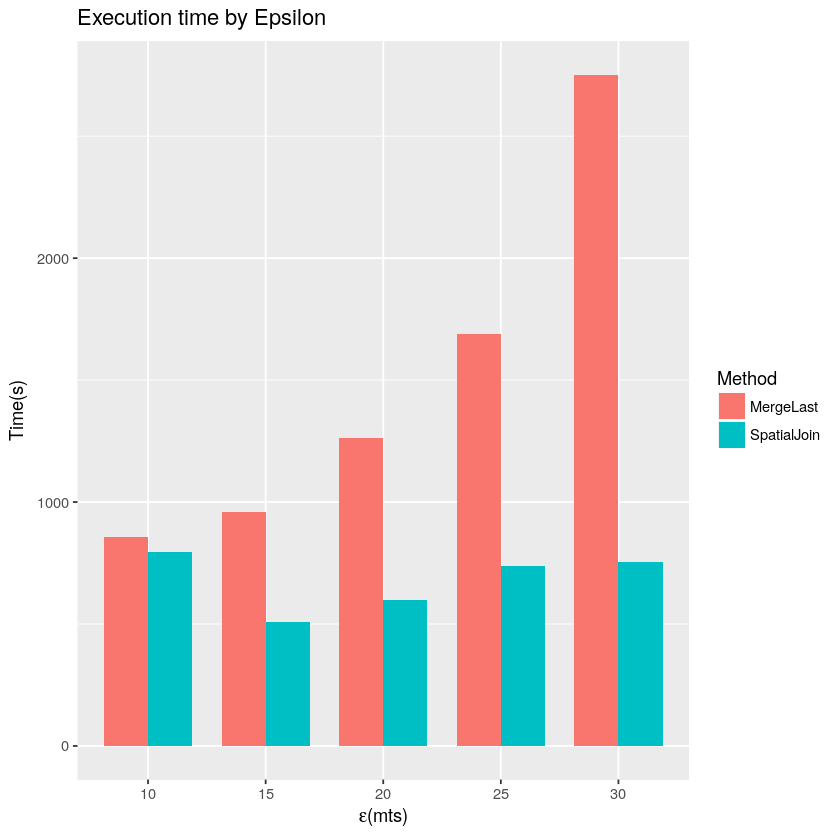

In [7]:
query = paste0("
SELECT 
    Method, Epsilon, AVG(Time) AS Time
FROM 
    data 
WHERE
    delta = ", deltaDefault,"
    AND Mu = ", muDefault,"
GROUP BY
    Method, Epsilon
ORDER BY
    Epsilon
")
df = sqldf(query)
df
title = "Execution time by Epsilon"
g = ggplot(data=df, aes(x=factor(Epsilon), y=Time, fill=Method)) +
  geom_bar(stat="identity", position=position_dodge(width = 0.75),width = 0.75) +
  labs(title=title, y="Time(s)", x=expression(paste(epsilon,"(mts)"))) 
plot(g)

Method,Delta,Time
MergeLast,3,1976.0103
SpatialJoin,3,699.9853
MergeLast,5,2950.7193
SpatialJoin,5,1046.5244
MergeLast,7,6472.3243
SpatialJoin,7,7226.9740


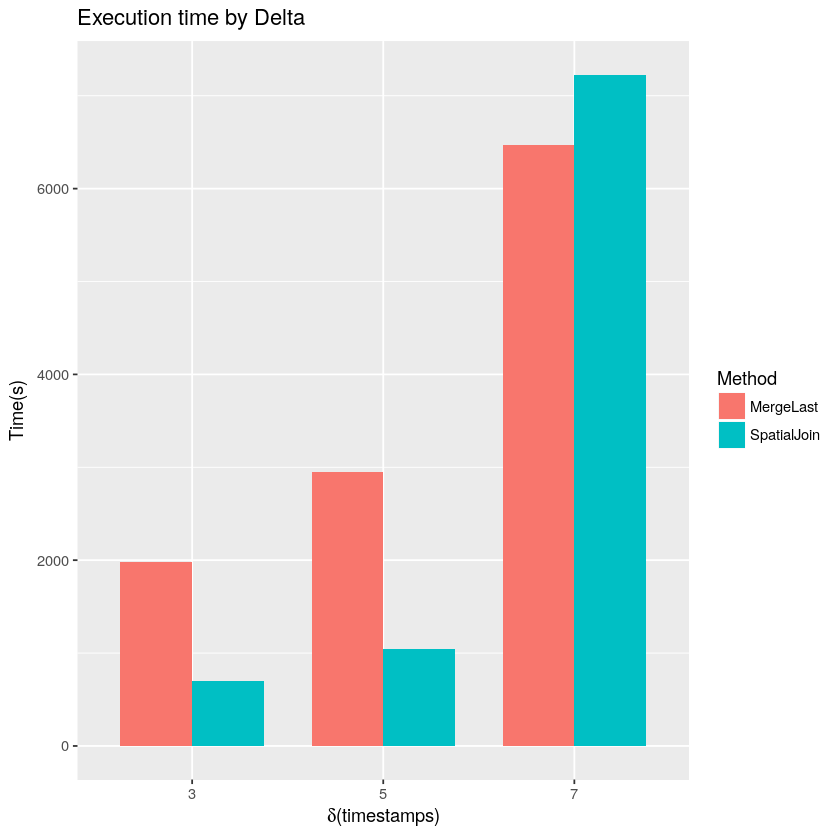

In [8]:
query = paste0("
SELECT 
    Method, Delta, AVG(methodTime) AS Time
FROM 
    data 
WHERE
    Epsilon = ", epsilonDefault,"
    AND Mu = ", muDefault,"
GROUP BY
    Method, Delta
ORDER BY
    Delta
")
df = sqldf(query)
df
title = "Execution time by Delta"
g = ggplot(data=df, aes(x=factor(Delta), y=Time, fill=Method)) +
  geom_bar(stat="identity", position=position_dodge(width = 0.75),width = 0.75) +
  labs(title=title, y="Time(s)", x=expression(paste(delta,"(timestamps)")))

plot(g)

Method,Mu,Time
MergeLast,3,3219.3860
SpatialJoin,3,935.4593
MergeLast,4,2950.7193
SpatialJoin,4,1046.5244
MergeLast,5,4752.1143
SpatialJoin,5,2039.9223


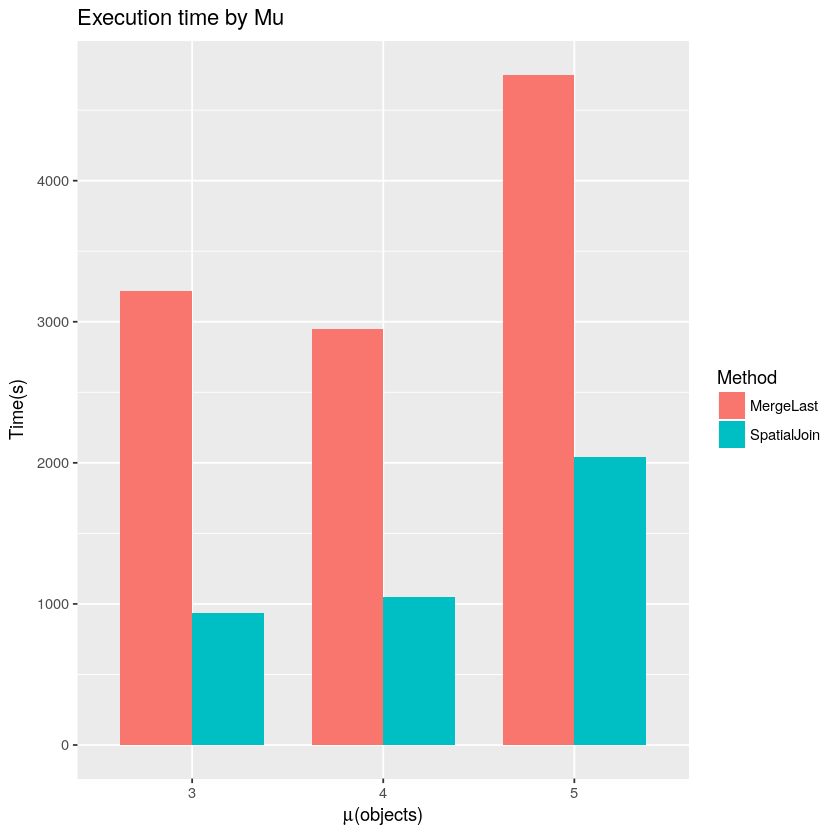

In [9]:
query = paste0("
SELECT 
    Method, Mu, AVG(methodTime) AS Time
FROM 
    data 
WHERE
    Epsilon = ", epsilonDefault,"
    AND Delta = ", deltaDefault,"
GROUP BY
    Method, Mu
ORDER BY
    Mu
")
df = sqldf(query)
df
title = "Execution time by Mu"
g = ggplot(data=df, aes(x=factor(Mu), y=Time, fill=Method)) +
  geom_bar(stat="identity", position=position_dodge(width = 0.75),width = 0.75) +
  labs(title=title, y="Time(s)", x=expression(paste(mu,"(objects)"))) 

plot(g)

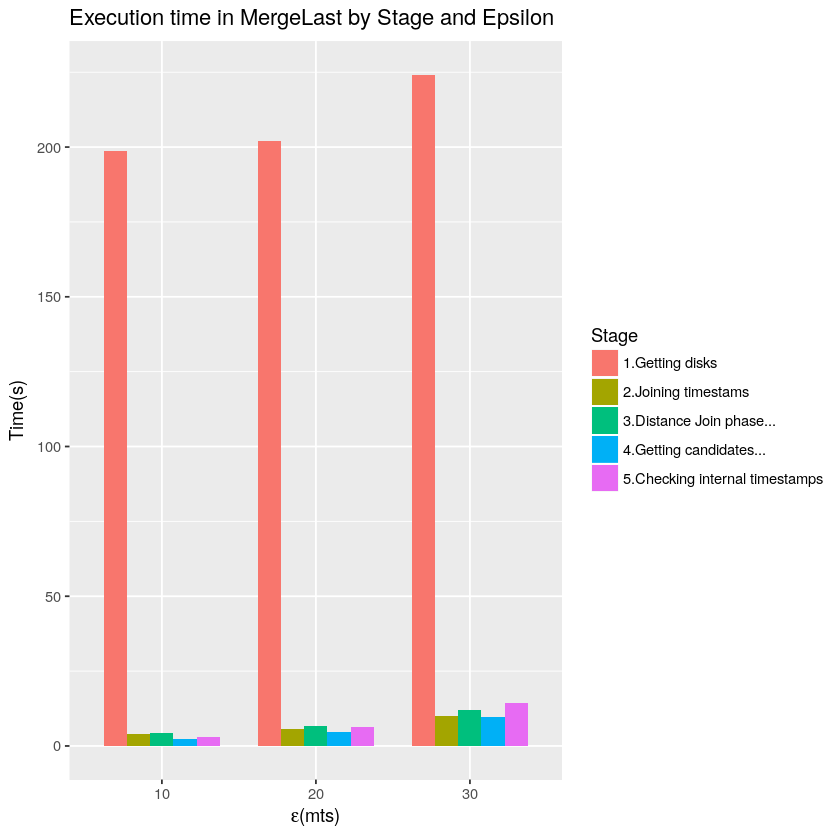

In [10]:
query = paste0("
SELECT
    Epsilon, Stage, AVG(stageTime) AS Time
FROM
    data
WHERE
    delta = ", deltaDefault,"
    AND Mu = ", muDefault,"
    AND method LIKE 'MergeLast'
    AND Stage != 'Running MergeLast...'
GROUP BY
    Epsilon, Stage
ORDER BY
    Epsilon
")
df = sqldf(query)
title = "Execution time in MergeLast by Stage and Epsilon"
g = ggplot(data=df, aes(x=factor(Epsilon), y=Time, fill=Stage)) +
  geom_bar(stat="identity", position=position_dodge(width = 0.75),width = 0.75) +
  labs(title=title, y="Time(s)", x=expression(paste(epsilon,"(mts)"))) 

plot(g)

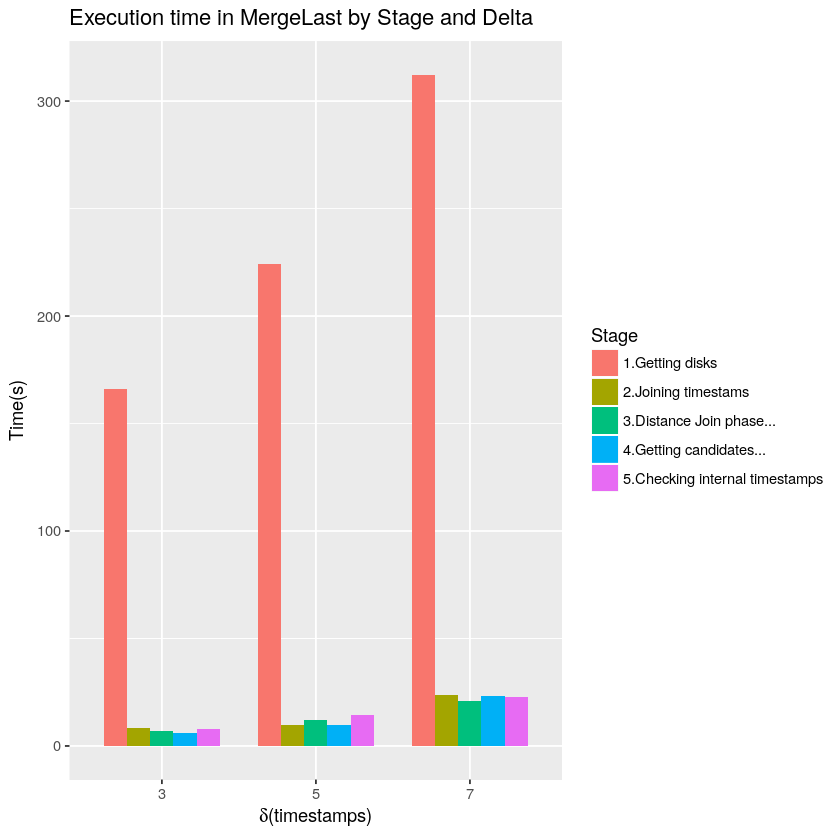

In [11]:
query = paste0("
SELECT
    Delta, Stage, AVG(stageTime) AS Time
FROM
    data
WHERE
    epsilon = ", epsilonDefault,"
    AND Mu = ", muDefault,"
    AND method LIKE 'MergeLast'
    AND Stage != 'Running MergeLast...'
GROUP BY
    Delta, Stage
ORDER BY
    Delta
")
df = sqldf(query)
title = "Execution time in MergeLast by Stage and Delta"
g = ggplot(data=df, aes(x=factor(Delta), y=Time, fill=Stage)) +
  geom_bar(stat="identity", position=position_dodge(width = 0.75),width = 0.75) +
  labs(title=title, y="Time(s)", x=expression(paste(delta,"(timestamps)")))

plot(g)

In [12]:
library(doBy)
query = paste0("
SELECT
    Epsilon, Mu, Delta, Stage, stageTime AS Time
FROM
    data
WHERE
    epsilon = ", epsilonDefault,"
    AND Mu = ", muDefault,"
    AND method LIKE 'MergeLast'
    AND Stage != 'Running MergeLast...'
ORDER BY
    date
")
df = sqldf(query)
df = summaryBy(data=df, Time ~ Epsilon + Mu + Delta + Stage, FUN = function(x){ c(m=mean(x), s=sd(x)) })
df

Epsilon,Mu,Delta,Stage,Time.m,Time.s
30,4,3,1.Getting disks,165.935185,85.1852385
30,4,3,2.Joining timestams,8.392593,0.5982834
30,4,3,3.Distance Join phase...,7.091111,0.4125841
30,4,3,4.Getting candidates...,6.006296,0.6124362
30,4,3,5.Checking internal timestamps,8.000000,0.8887589
30,4,5,1.Getting disks,224.185079,92.5455535
30,4,5,2.Joining timestams,9.934127,1.2382123
30,4,5,3.Distance Join phase...,11.940635,4.6513634
30,4,5,4.Getting candidates...,9.622857,3.0432925
30,4,5,5.Checking internal timestamps,14.293651,4.2869477


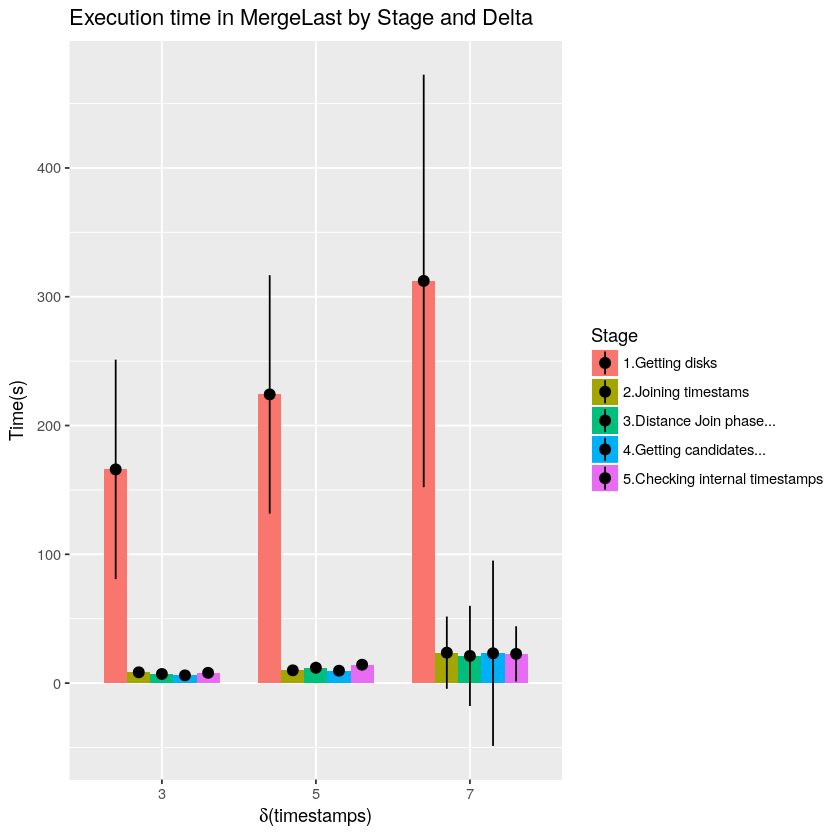

In [13]:
title = "Execution time in MergeLast by Stage and Delta"
g = ggplot(data=df, aes(x=factor(Delta), y=Time.m, fill=Stage, ymin = Time.m-Time.s, ymax = Time.m+Time.s)) +
  geom_bar(stat="identity", position=position_dodge(width = 0.75),width = 0.75) +
  geom_pointrange(position=position_dodge(width = 0.75)) +
  labs(title=title, y="Time(s)", x=expression(paste(delta,"(timestamps)")))

plot(g)

In [14]:
query = paste0("
SELECT
    Epsilon, Mu, Delta, Stage, stageTime AS Time
FROM
    data
WHERE
    delta = ", deltaDefault,"
    AND Mu = ", muDefault,"
    AND method LIKE 'MergeLast'
    AND Stage != 'Running MergeLast...'
ORDER BY
    date
")
df = sqldf(query)
df = summaryBy(data=df, Time ~ Epsilon + Mu + Delta + Stage, FUN = function(x){ c(m=mean(x), s=sd(x)) })
df

Epsilon,Mu,Delta,Stage,Time.m,Time.s
10,4,5,1.Getting disks,198.524286,93.8589047
10,4,5,2.Joining timestams,4.000000,0.2513762
10,4,5,3.Distance Join phase...,4.166984,0.2384333
10,4,5,4.Getting candidates...,2.366984,0.1779510
10,4,5,5.Checking internal timestamps,3.056667,0.1695681
20,4,5,1.Getting disks,202.145238,93.2729952
20,4,5,2.Joining timestams,5.669524,0.6233336
20,4,5,3.Distance Join phase...,6.656190,1.1125246
20,4,5,4.Getting candidates...,4.617778,0.7905785
20,4,5,5.Checking internal timestamps,6.415714,0.5943448


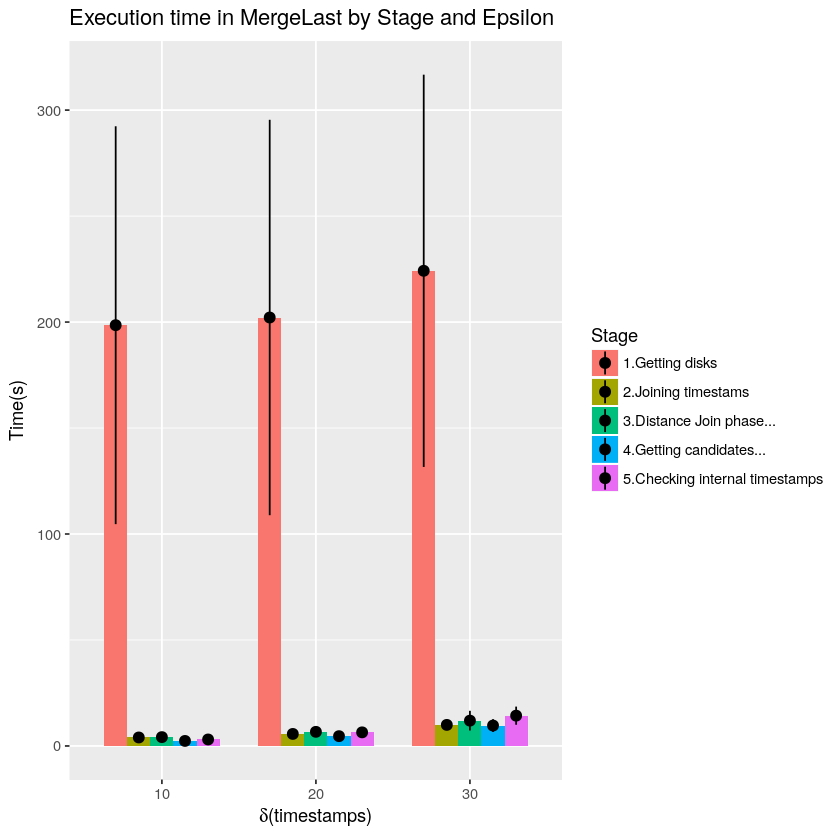

In [15]:
title = "Execution time in MergeLast by Stage and Epsilon"
g = ggplot(data=df, aes(x=factor(Epsilon), y=Time.m, fill=Stage, ymin = Time.m-Time.s, ymax = Time.m+Time.s)) +
  geom_bar(stat="identity", position=position_dodge(width = 0.75),width = 0.75) +
  geom_pointrange(position=position_dodge(width = 0.75)) +
  labs(title=title, y="Time(s)", x=expression(paste(delta,"(timestamps)")))

plot(g)

In [6]:
mdf = read.csv(paste0(RESEARCH_HOME, PATH, 'mdfTimestamps.csv'), header = F, sep = ";")

names(mdf) = c("Timestamp", "Method", "Epsilon", "Mu", "Delta", "Stage", "stageTime", "Load", "totalTime")
mdf$Timestamp  = as.numeric(as.character(mdf$Timestamp))
mdf$Epsilon    = as.numeric(as.character(mdf$Epsilon))
mdf$Mu         = as.numeric(as.character(mdf$Mu))
mdf$Delta      = as.numeric(as.character(mdf$Delta))
mdf$stageTime  = as.numeric(as.character(mdf$stageTime))
mdf$totalTime  = as.numeric(as.character(mdf$totalTime))

library(dplyr)
mdf_summary = group_by(mdf, Method, Stage)
mdf_summary = summarise(mdf_summary, time = mean(stageTime), load = mean(Load)/mean(stageTime))
dcast(mdf_summary, Method ~ Stage, value.var = "time")

Method,B.Indexing points...,C.Getting pairs...,D.Computing centers...,E.Indexing centers...,F.Getting disks...,G.Filtering less-than-mu disks...,H.Prunning duplicate candidates...,I.Indexing candidates...,J.Getting expansions...,K.Finding maximal disks...,L.Prunning duplicates and subsets...
MergeLast,149.357000,9.137727,1.520727,1.088909,6.621455,0.2970000,4.561909,4.974455,0.2267273,0.2366364,2.012182
SpatialJoin,6.166091,9.516000,1.593000,1.104818,7.029727,0.2801818,5.074364,5.504636,0.2876364,0.1995455,1.864182


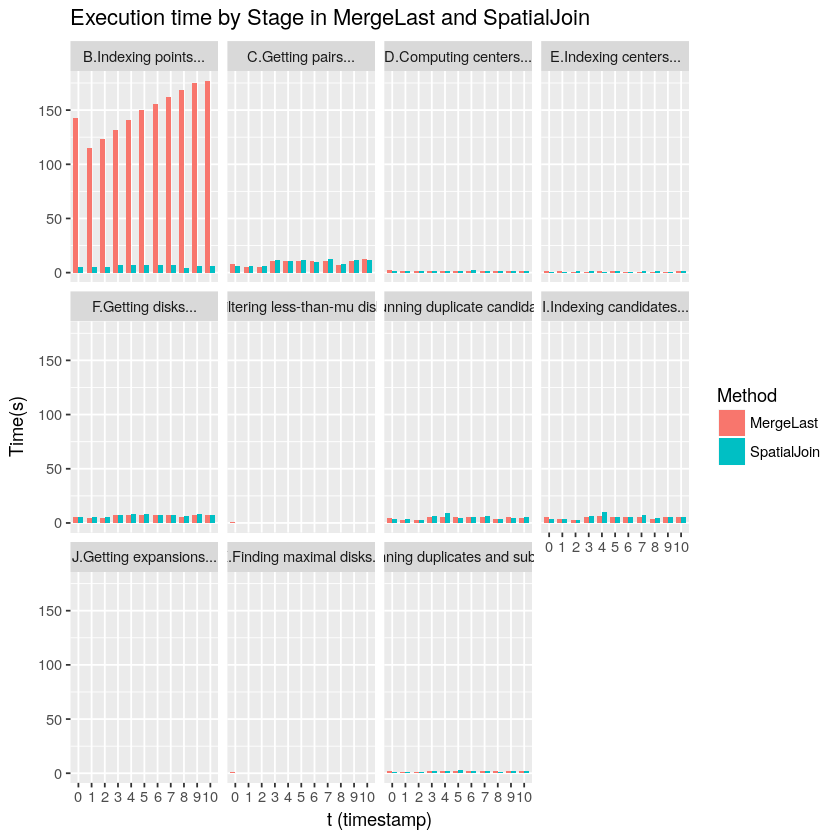

In [17]:
title = "Execution time by Stage in MergeLast and SpatialJoin"
g = ggplot(data=mdf, aes(x=factor(Timestamp), y=stageTime, fill=Method)) +
  geom_bar(stat="identity", position=position_dodge(width = 0.75),width = 0.75) +
  facet_wrap(~Stage) +
  labs(title=title, y="Time(s)", x="t (timestamp)")

plot(g)